## Convert categorical variables to numerical format

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('customer_churn (3).csv')

# Display first few rows and info to identify categorical columns
print(df.head())
print(df.info())

  CustomerID  Tenure  MonthlyCharges  TotalCharges        Contract  \
0     C00001       6              64          1540        One year   
1     C00002      21             113          1753  Month-to-month   
2     C00003      27              31          1455        Two year   
3     C00004      53              29          7150  Month-to-month   
4     C00005      16             185          1023        One year   

      PaymentMethod PaperlessBilling  SeniorCitizen  Churn  
0       Credit Card               No              1      0  
1  Electronic Check              Yes              1      0  
2       Credit Card               No              1      0  
3  Electronic Check               No              1      0  
4  Electronic Check               No              1      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID  

In [2]:
# Check unique values for categorical columns
cat_cols = ['Contract', 'PaymentMethod', 'PaperlessBilling']
for col in cat_cols:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in Contract: ['One year' 'Month-to-month' 'Two year']
Unique values in PaymentMethod: ['Credit Card' 'Electronic Check' 'Bank Transfer']
Unique values in PaperlessBilling: ['No' 'Yes']


In [3]:
# Step 1: Binary Encoding for PaperlessBilling
df_encoded = df.copy()
df_encoded['PaperlessBilling'] = df_encoded['PaperlessBilling'].map({'Yes': 1, 'No': 0})

# Step 2: Ordinal Encoding for Contract
contract_mapping = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
df_encoded['Contract'] = df_encoded['Contract'].map(contract_mapping)

# Step 3: One-Hot Encoding for PaymentMethod
df_encoded = pd.get_dummies(df_encoded, columns=['PaymentMethod'], prefix='PM')

# Step 4: Drop CustomerID for the numerical-only version (optional, but good practice for ML)
# I will keep a version with and without CustomerID. 
# Usually 'conversion to numerical' implies the features.
df_numerical = df_encoded.drop(columns=['CustomerID'])

# Save the result
df_encoded.to_csv('customer_churn_encoded.csv', index=False)

print(df_encoded.head())
print(df_encoded.info())

  CustomerID  Tenure  MonthlyCharges  TotalCharges  Contract  \
0     C00001       6              64          1540         1   
1     C00002      21             113          1753         0   
2     C00003      27              31          1455         2   
3     C00004      53              29          7150         0   
4     C00005      16             185          1023         1   

   PaperlessBilling  SeniorCitizen  Churn  PM_Bank Transfer  PM_Credit Card  \
0                 0              1      0             False            True   
1                 1              1      0             False           False   
2                 0              1      0             False            True   
3                 0              1      0             False           False   
4                 0              1      0             False           False   

   PM_Electronic Check  
0                False  
1                 True  
2                False  
3                 True  
4              

In [4]:
# Refine One-Hot columns to integers
bool_cols = [col for col in df_encoded.columns if df_encoded[col].dtype == 'bool']
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

# Final check
print(df_encoded.head())

# Save again
df_encoded.to_csv('customer_churn_encoded.csv', index=False)

  CustomerID  Tenure  MonthlyCharges  TotalCharges  Contract  \
0     C00001       6              64          1540         1   
1     C00002      21             113          1753         0   
2     C00003      27              31          1455         2   
3     C00004      53              29          7150         0   
4     C00005      16             185          1023         1   

   PaperlessBilling  SeniorCitizen  Churn  PM_Bank Transfer  PM_Credit Card  \
0                 0              1      0                 0               1   
1                 1              1      0                 0               0   
2                 0              1      0                 0               1   
3                 0              1      0                 0               0   
4                 0              1      0                 0               0   

   PM_Electronic Check  
0                    0  
1                    1  
2                    0  
3                    1  
4              

## Scale numerical features using different methods

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Load the encoded dataset
df = pd.read_csv('customer_churn_encoded.csv')

# Numerical features to scale
num_features = ['Tenure', 'MonthlyCharges', 'TotalCharges']

# 1. Standard Scaling (Z-score normalization)
# Result: Mean=0, StdDev=1
std_scaler = StandardScaler()
df_standard = df.copy()
df_standard[num_features] = std_scaler.fit_transform(df[num_features])
df_standard.to_csv('customer_churn_standard_scaled.csv', index=False)

# 2. Min-Max Scaling (Normalization)
# Result: Values between 0 and 1
minmax_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[num_features] = minmax_scaler.fit_transform(df[num_features])
df_minmax.to_csv('customer_churn_minmax_scaled.csv', index=False)

# 3. Robust Scaling
# Result: Scales using median and interquartile range (IQR), robust to outliers
robust_scaler = RobustScaler()
df_robust = df.copy()
df_robust[num_features] = robust_scaler.fit_transform(df[num_features])
df_robust.to_csv('customer_churn_robust_scaled.csv', index=False)

# Display a comparison of the first few rows for one feature (e.g., MonthlyCharges)
comparison = pd.DataFrame({
    'Original': df['MonthlyCharges'].head(),
    'Standard': df_standard['MonthlyCharges'].head(),
    'MinMax': df_minmax['MonthlyCharges'].head(),
    'Robust': df_robust['MonthlyCharges'].head()
})

print("Scaling Comparison for 'MonthlyCharges':")
print(comparison)

Scaling Comparison for 'MonthlyCharges':
   Original  Standard    MinMax    Robust
0        64 -0.959185  0.245810 -0.560440
1       113 -0.012290  0.519553 -0.021978
2        31 -1.596890  0.061453 -0.923077
3        29 -1.635539  0.050279 -0.945055
4       185  1.379066  0.921788  0.769231


## Identify and handle outliers in datasets

Outlier Identification (IQR Method):
Tenure: {'Lower Bound': -33.5, 'Upper Bound': 106.5, 'Outlier Count': 0}
MonthlyCharges: {'Lower Bound': -69.5, 'Upper Bound': 294.5, 'Outlier Count': 0}
TotalCharges: {'Lower Bound': -3807.0, 'Upper Bound': 12311.0, 'Outlier Count': 0}

Outliers handled by capping values at the IQR bounds.


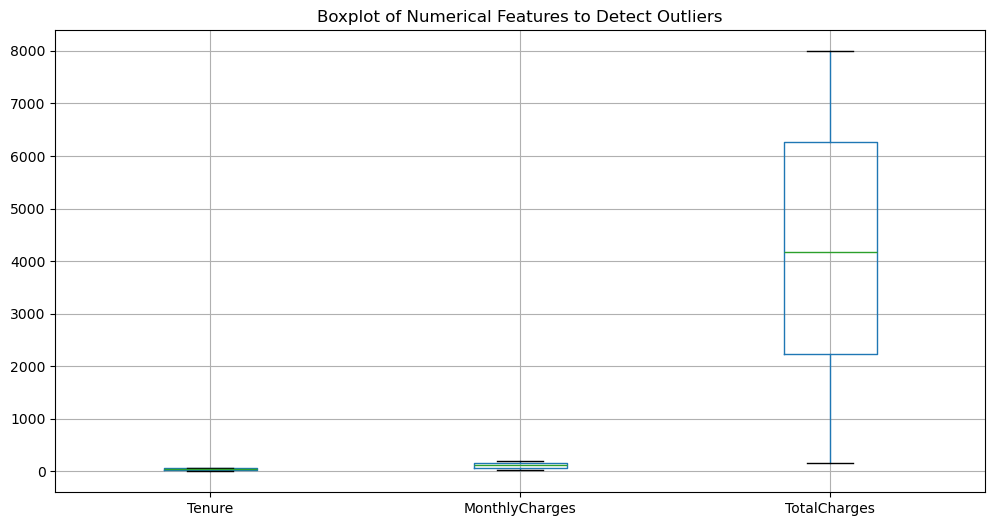

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# Load the original dataset (categorical/numerical mixture is fine for identifying outliers in num columns)
df = pd.read_csv('customer_churn (3).csv')
num_features = ['Tenure', 'MonthlyCharges', 'TotalCharges']

# 1. Identify Outliers using IQR method
outlier_info = {}
for col in num_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_info[col] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': len(outliers)
    }

print("Outlier Identification (IQR Method):")
for col, info in outlier_info.items():
    print(f"{col}: {info}")

# Visualizing with boxplots
plt.figure(figsize=(12, 6))
df[num_features].boxplot()
plt.title('Boxplot of Numerical Features to Detect Outliers')
plt.savefig('outlier_boxplot.png')

# 2. Handle Outliers (Capping/Winsorization)
# We will create a new dataframe where outliers are capped at the bounds.
df_handled = df.copy()
for col in num_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_handled[col] = np.clip(df_handled[col], lower_bound, upper_bound)

# Save the handled dataset
df_handled.to_csv('customer_churn_outliers_handled.csv', index=False)

print("\nOutliers handled by capping values at the IQR bounds.")

## Select important features for machine learning

Correlation with Churn:
Churn                  1.000000
MonthlyCharges         0.107381
PM_Credit Card         0.069635
PaperlessBilling       0.016145
PM_Electronic Check    0.010007
TotalCharges           0.004250
SeniorCitizen         -0.018114
PM_Bank Transfer      -0.081669
Contract              -0.182759
Tenure                -0.509208
Name: Churn, dtype: float64

Random Forest Feature Importances:
               Feature  Importance
0               Tenure    0.642850
1       MonthlyCharges    0.108302
3             Contract    0.103920
2         TotalCharges    0.094988
4     PaperlessBilling    0.013886
5        SeniorCitizen    0.010741
6     PM_Bank Transfer    0.009401
7       PM_Credit Card    0.008006
8  PM_Electronic Check    0.007905


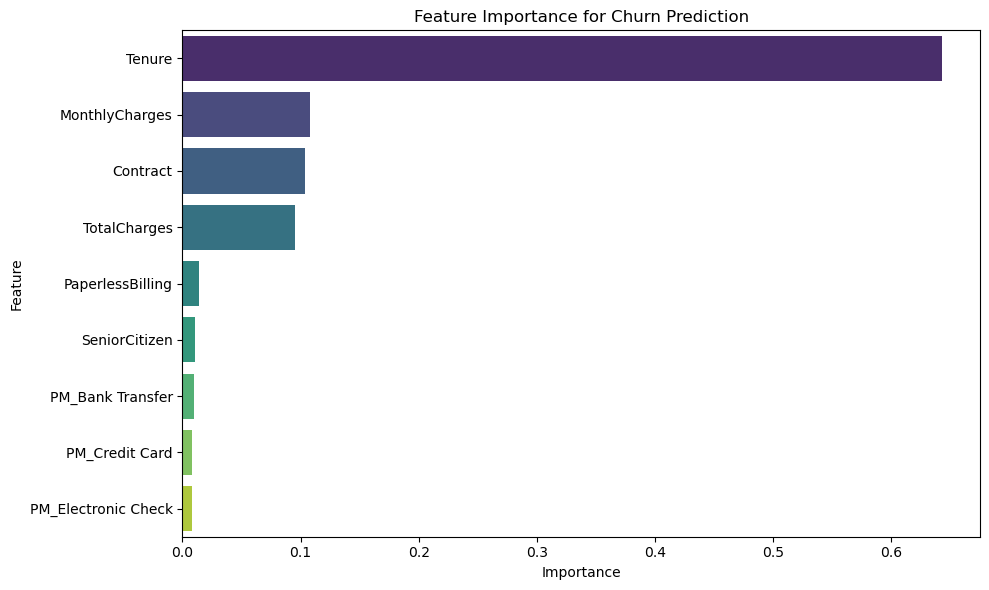

In [7]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Load the encoded dataset
df = pd.read_csv('customer_churn_encoded.csv')

# Drop CustomerID as it's just an identifier
df_ml = df.drop(columns=['CustomerID'])

# Separate features and target
X = df_ml.drop(columns=['Churn'])
y = df_ml['Churn']

# 1. Correlation Analysis
correlations = df_ml.corr()['Churn'].sort_values(ascending=False)
print("Correlation with Churn:")
print(correlations)

# 2. Feature Importance using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nRandom Forest Feature Importances:")
print(importances)

# Plotting Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')
plt.title('Feature Importance for Churn Prediction')
plt.tight_layout()
plt.savefig('feature_importance.png')

## Create new features through combination and transformation

In [8]:
# Load the encoded dataset
df = pd.read_csv('customer_churn_encoded.csv')

# 1. Ratio Feature: Average Monthly Charge over Tenure
# Adding 1 to Tenure to avoid division by zero (though tenure starts at 6 in head)
df['HistoricalAvgMonthly'] = df['TotalCharges'] / (df['Tenure'] + 0.1)

# 2. Difference Feature: Current Monthly Charge vs Historical Average
# This can indicate if a customer's bill recently increased.
df['ChargeIncrease'] = df['MonthlyCharges'] - df['HistoricalAvgMonthly']

# 3. Binning Tenure: Categorize tenure into groups
# 0-12 months: New, 13-36: Established, 37+: Loyal
bins = [0, 12, 36, 100]
labels = [0, 1, 2] # New, Established, Loyal
df['TenureGroup'] = pd.cut(df['Tenure'], bins=bins, labels=labels).astype(int)

# 4. Interaction Feature: Tenure multiplied by Contract
# Since both were high importance, their interaction might capture more signal.
df['Tenure_Contract_Interaction'] = df['Tenure'] * df['Contract']

# 5. Log Transformation: TotalCharges
# If TotalCharges is skewed, log transformation helps normalization.
df['Log_TotalCharges'] = np.log1p(df['TotalCharges'])

# Save the feature-engineered dataset
df.to_csv('customer_churn_engineered.csv', index=False)

# Display first few rows of new features
new_cols = ['HistoricalAvgMonthly', 'ChargeIncrease', 'TenureGroup', 'Tenure_Contract_Interaction', 'Log_TotalCharges']
print(df[new_cols].head())

   HistoricalAvgMonthly  ChargeIncrease  TenureGroup  \
0            252.459016     -188.459016            0   
1             83.080569       29.919431            1   
2             53.690037      -22.690037            1   
3            134.651601     -105.651601            2   
4             63.540373      121.459627            1   

   Tenure_Contract_Interaction  Log_TotalCharges  
0                            6          7.340187  
1                            0          7.469654  
2                           54          7.283448  
3                            0          8.875007  
4                           16          6.931472  


## Build complete data preprocessing pipelines

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
# Load original data
df = pd.read_csv('customer_churn (3).csv')

# Define target and features
X = df.drop(columns=['Churn', 'CustomerID'])
y = df['Churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Custom Transformer for Feature Engineering
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        # Create HistoricalAvgMonthly
        X['HistoricalAvgMonthly'] = X['TotalCharges'] / (X['Tenure'] + 0.1)
        # Create Tenure_Contract interaction would need encoding first, 
        # so we'll stick to simple ratio/log features here or do it post-pipeline
        X['Log_TotalCharges'] = np.log1p(X['TotalCharges'])
        return X

# Define column groups
num_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges', 'HistoricalAvgMonthly', 'Log_TotalCharges']
cat_cols = ['PaymentMethod', 'PaperlessBilling']
ord_cols = ['Contract']

# 1. Numerical Pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# 2. Categorical Pipeline (One-Hot)
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# 3. Ordinal Pipeline
ord_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[['Month-to-month', 'One year', 'Two year']]))
])

# Combine into a Preprocessor
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols),
    ('ord', ord_pipeline, ord_cols)
])

# Create the full pipeline including Feature Engineering
full_pipeline = Pipeline([
    ('engineer', FeatureEngineer()),
    ('preprocess', preprocessor)
])

# Fit and Transform
X_train_processed = full_pipeline.fit_transform(X_train)
X_test_processed = full_pipeline.transform(X_test)

# Get feature names for the output dataframe
ohe_features = full_pipeline.named_steps['preprocess'].transformers_[1][1].named_steps['ohe'].get_feature_names_out(cat_cols)
feature_names = num_cols + list(ohe_features) + ord_cols

# Convert back to DataFrame for visibility
X_train_final = pd.DataFrame(X_train_processed, columns=feature_names)
X_train_final['Churn'] = y_train.values

X_train_final.to_csv('customer_churn_pipeline_processed.csv', index=False)

print("Pipeline Steps:")
print(full_pipeline.steps)
print("\nProcessed Data Shape:", X_train_final.shape)
print("\nFirst 5 rows of processed training data:")
print(X_train_final.head())

Pipeline Steps:
[('engineer', FeatureEngineer()), ('preprocess', ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Tenure', 'MonthlyCharges', 'TotalCharges',
                                  'HistoricalAvgMonthly', 'Log_TotalCharges']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['PaymentMethod', 'PaperlessBilling']),
         